In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from scipy.special import expit
from scipy.stats import logistic

import dask.dataframe as dd 

%matplotlib inline

In [59]:
pd.set_option('display.max_columns', None)

In [60]:
suspensionData = pd.read_csv("201516suspensions.csv")
suspensionData.head()

,DBN,LOCATION NAME,LOCATION CATEGORY,ADMINISTRATIVE DISTRICT,TOTAL STUDENTS,TOTAL STUDENTS,AMERICAN INDIAN/ALASKAN NATIVE STUDENTS,ASIAN STUDENTS,BLACK STUDENTS,HISPANIC STUDENTS,WHITE STUDENTS,MULTI-RACIAL STUDENTS,UNKNOWN STUDENTS,GEN ED STUDENTS,SWD STUDENTS,GEN ED STUDENTS.1,SWD STUDENTS.1,5 STUDENTS,6 STUDENTS,7 STUDENTS,8 STUDENTS,9 STUDENTS,10 STUDENTS,11 STUDENTS,12 STUDENTS,13 STUDENTS,14 STUDENTS,15 STUDENTS,16 STUDENTS,17 STUDENTS,18 STUDENTS,19 STUDENTS,20 STUDENTS,21 STUDENTS,GL0K STUDENTS,GL01 STUDENTS,GL02 STUDENTS,GL03 STUDENTS,GL04 STUDENTS,GL05 STUDENTS,GL06 STUDENTS,GL07 STUDENTS,GL08 STUDENTS,GL09 STUDENTS,GL10 STUDENTS,GL11 STUDENTS,GL12 STUDENTS,FEMALE STUDENTS,MALE STUDENTS,NON-ELL STUDENTS,ELL STUDENTS,NON-STH STUDENTS,STH STUDENTS,AMERICAN INDIAN/ALASKAN NATIVE SUSPENSIONS NYPD Contact,ASIAN SUSPENSIONS NYPD Contact,BLACK SUSPENSIONS NYPD Contact,HISPANIC SUSPENSIONS NYPD Contact,MULTI-RACIAL SUSPENSIONS NYPD Contact,UNKNOWN SUSPENSIONS NYPD Contact,WHITE SUSPENSIONS NYPD Contact,TOTAL SUSPENSIONS NYPD Contact,GEN ED SUSPENSIONS NYPD Contact,SWD SUSPENSIONS NYPD Contact,5 SUSPENSIONS NYPD Contact (2010),6 SUSPENSIONS NYPD Contact (2009),7 SUSPENSIONS NYPD Contact (2008),8 SUSPENSIONS NYPD Contact (2007),9 SUSPENSIONS NYPD Contact (2006),10 SUSPENSIONS NYPD Contact (2005),11 SUSPENSIONS NYPD Contact (2004),12 SUSPENSIONS NYPD Contact (2003),13 SUSPENSIONS NYPD Contact (2002),14 SUSPENSIONS NYPD Contact (2001),15 SUSPENSIONS NYPD Contact (2000),16 SUSPENSIONS NYPD Contact (1999),17 SUSPENSIONS NYPD Contact (1998),18 SUSPENSIONS NYPD Contact (1997),19 SUSPENSIONS NYPD Contact (1996),20 SUSPENSIONS NYPD Contact (1995),21 SUSPENSIONS NYPD Contact (1994),GL0K STUDENTS NYPD Contact,GL01 STUDENTS NYPD Contact,GL02 STUDENTS NYPD Contact,GL03 STUDENTS NYPD Contact,GL04 STUDENTS NYPD Contact,NYPD ContactGL05 STUDENTS,GL06 STUDENTS NYPD Contact,GL07 STUDENTS NYPD Contact,GL08 STUDENTS NYPD Contact,GL09 STUDENTS NYPD Contact,GL10 STUDENTS NYPD Contact,GL11 STUDENTS NYPD Contact,GL12 STUDENTS NYPD Contact,MALE SUSPENSIONS NYPD Contact,FEMALE SUSPENSIONS NYPD Contact,NON-ELL SUSPENSIONS NYPD Contact,ELL SUSPENSIONS NYPD Contact,NON-STH SUSPENSIONS NYPD Contact,STH SUSPENSIONS NYPD Contact,American Indian/Alaskan Native REMOVALS,American Indian/Alaskan Native PRINCIPAL,American Indian/Alaskan Native SUPERINTENDENT,American Indian/Alaskan Native EXPULSIONS,Asian REMOVALS,Asian PRINCIPAL,Asian SUPERINTENDENT,Asian EXPULSIONS,Black REMOVALS,Black PRINCIPAL,Black SUPERINTENDENT,Black EXPULSIONS,Hispanic REMOVALS,Hispanic PRINCIPAL,Hispanic SUPERINTENDENT,Hispanic EXPULSIONS,White REMOVALS,White PRINCIPAL,White SUPERINTENDENT,White EXPULSIONS,Multi-Racial REMOVALS,Multi-Racial PRINCIPAL,Multi-Racial SUPERINTENDENT,Multi-Racial EXPULSIONS,Unknown REMOVALS,Unknown PRINCIPAL,Unknown SUPERINTENDENT,Unknown EXPULSIONS
0,01M015,P.S. 015 Roberto Clemente,Elementary,1.0,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
1,01M019,P.S. 019 Asher Levy,Elementary,1.0,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
2,01M020,P.S. 020 Anna Silver,Elementary,1.0,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,8,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
3,01M034,P.S. 034 Franklin D. Roosevelt,K-8,1.0,14,14,*,*,*,*,*,*,*,8,6,8,6,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,8,6,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,

In [61]:
suspensionData.shape

(1743, 127)

In [62]:
suspensionData.describe(include = ["O"])

,DBN,LOCATION NAME,LOCATION CATEGORY,TOTAL STUDENTS,TOTAL STUDENTS,AMERICAN INDIAN/ALASKAN NATIVE STUDENTS,ASIAN STUDENTS,BLACK STUDENTS,HISPANIC STUDENTS,WHITE STUDENTS,MULTI-RACIAL STUDENTS,UNKNOWN STUDENTS,GEN ED STUDENTS,SWD STUDENTS,GEN ED STUDENTS.1,SWD STUDENTS.1,5 STUDENTS,6 STUDENTS,7 STUDENTS,8 STUDENTS,9 STUDENTS,10 STUDENTS,11 STUDENTS,12 STUDENTS,13 STUDENTS,14 STUDENTS,15 STUDENTS,16 STUDENTS,17 STUDENTS,18 STUDENTS,19 STUDENTS,20 STUDENTS,21 STUDENTS,GL0K STUDENTS,GL01 STUDENTS,GL02 STUDENTS,GL03 STUDENTS,GL04 STUDENTS,GL05 STUDENTS,GL06 STUDENTS,GL07 STUDENTS,GL08 STUDENTS,GL09 STUDENTS,GL10 STUDENTS,GL11 STUDENTS,GL12 STUDENTS,FEMALE STUDENTS,MALE STUDENTS,NON-ELL STUDENTS,ELL STUDENTS,NON-STH STUDENTS,STH STUDENTS,AMERICAN INDIAN/ALASKAN NATIVE SUSPENSIONS NYPD Contact,ASIAN SUSPENSIONS NYPD Contact,BLACK SUSPENSIONS NYPD Contact,HISPANIC SUSPENSIONS NYPD Contact,MULTI-RACIAL SUSPENSIONS NYPD Contact,UNKNOWN SUSPENSIONS NYPD Contact,WHITE SUSPENSIONS NYPD Contact,TOTAL SUSPENSIONS NYPD Contact,GEN ED SUSPENSIONS NYPD Contact,SWD SUSPENSIONS NYPD Contact,5 SUSPENSIONS NYPD Contact (2010),6 SUSPENSIONS NYPD Contact (2009),7 SUSPENSIONS NYPD Contact (2008),8 SUSPENSIONS NYPD Contact (2007),9 SUSPENSIONS NYPD Contact (2006),10 SUSPENSIONS NYPD Contact (2005),11 SUSPENSIONS NYPD Contact (2004),12 SUSPENSIONS NYPD Contact (2003),13 SUSPENSIONS NYPD Contact (2002),14 SUSPENSIONS NYPD Contact (2001),15 SUSPENSIONS NYPD Contact (2000),16 SUSPENSIONS NYPD Contact (1999),17 SUSPENSIONS NYPD Contact (1998),18 SUSPENSIONS NYPD Contact (1997),19 SUSPENSIONS NYPD Contact (1996),20 SUSPENSIONS NYPD Contact (1995),21 SUSPENSIONS NYPD Contact (1994),GL0K STUDENTS NYPD Contact,GL01 STUDENTS NYPD Contact,GL02 STUDENTS NYPD Contact,GL03 STUDENTS NYPD Contact,GL04 STUDENTS NYPD Contact,NYPD ContactGL05 STUDENTS,GL06 STUDENTS NYPD Contact,GL07 STUDENTS NYPD Contact,GL08 STUDENTS NYPD Contact,GL09 STUDENTS NYPD Contact,GL10 STUDENTS NYPD Contact,GL11 STUDENTS NYPD Contact,GL12 STUDENTS NYPD Contact,MALE SUSPENSIONS NYPD Contact,FEMALE SUSPENSIONS NYPD Contact,NON-ELL SUSPENSIONS NYPD Contact,ELL SUSPENSIONS NYPD Contact,NON-STH SUSPENSIONS NYPD Contact,STH SUSPENSIONS NYPD Contact,American Indian/Alaskan Native REMOVALS,American Indian/Alaskan Native PRINCIPAL,American Indian/Alaskan Native SUPERINTENDENT,American Indian/Alaskan Native EXPULSIONS,Asian REMOVALS,Asian PRINCIPAL,Asian SUPERINTENDENT,Asian EXPULSIONS,Black REMOVALS,Black PRINCIPAL,Black SUPERINTENDENT,Black EXPULSIONS,Hispanic REMOVALS,Hispanic PRINCIPAL,Hispanic SUPERINTENDENT,Hispanic EXPULSIONS,White REMOVALS,White PRINCIPAL,White SUPERINTENDENT,White EXPULSIONS,Multi-Racial REMOVALS,Multi-Racial PRINCIPAL,Multi-Racial SUPERINTENDENT,Multi-Racial EXPULSIONS,Unknown REMOVALS,Unknown PRINCIPAL,Unknown SUPERINTENDENT,Unknown EXPULSIONS
count,1743,1742,1742,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743
unique,1743,1705,10,53,53,2,5,32,29,11,2,2,35,26,35,26,2,3,4,3,4,4,9,15,15,10,16,15,11,4,3,2,1,2,3,5,3,4,5,8,13,11,21,17,9,6,19,40,18,10,21,9,2,6,15,14,2,2,5,28,17,11,2,2,2,2,2,2,3,4,5,3,9,12,10,4,2,2,1,2,2,2,2,2,2,4,6,6,10,12,6,5,13,11,6,5,5,3,3,3,2,1,12,21,8,1,49,83,35,1,41,65,29,1,20,34,9,1,2,3,3,1,2,3,2,1
top,75K403,Home Schooling,Elementary,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*

In [63]:
#identify the null values/missing values 

suspensionData = pd.read_csv("201516suspensions.csv", na_values = ["*"])
suspensionData.head()

,DBN,LOCATION NAME,LOCATION CATEGORY,ADMINISTRATIVE DISTRICT,TOTAL STUDENTS,TOTAL STUDENTS,AMERICAN INDIAN/ALASKAN NATIVE STUDENTS,ASIAN STUDENTS,BLACK STUDENTS,HISPANIC STUDENTS,WHITE STUDENTS,MULTI-RACIAL STUDENTS,UNKNOWN STUDENTS,GEN ED STUDENTS,SWD STUDENTS,GEN ED STUDENTS.1,SWD STUDENTS.1,5 STUDENTS,6 STUDENTS,7 STUDENTS,8 STUDENTS,9 STUDENTS,10 STUDENTS,11 STUDENTS,12 STUDENTS,13 STUDENTS,14 STUDENTS,15 STUDENTS,16 STUDENTS,17 STUDENTS,18 STUDENTS,19 STUDENTS,20 STUDENTS,21 STUDENTS,GL0K STUDENTS,GL01 STUDENTS,GL02 STUDENTS,GL03 STUDENTS,GL04 STUDENTS,GL05 STUDENTS,GL06 STUDENTS,GL07 STUDENTS,GL08 STUDENTS,GL09 STUDENTS,GL10 STUDENTS,GL11 STUDENTS,GL12 STUDENTS,FEMALE STUDENTS,MALE STUDENTS,NON-ELL STUDENTS,ELL STUDENTS,NON-STH STUDENTS,STH STUDENTS,AMERICAN INDIAN/ALASKAN NATIVE SUSPENSIONS NYPD Contact,ASIAN SUSPENSIONS NYPD Contact,BLACK SUSPENSIONS NYPD Contact,HISPANIC SUSPENSIONS NYPD Contact,MULTI-RACIAL SUSPENSIONS NYPD Contact,UNKNOWN SUSPENSIONS NYPD Contact,WHITE SUSPENSIONS NYPD Contact,TOTAL SUSPENSIONS NYPD Contact,GEN ED SUSPENSIONS NYPD Contact,SWD SUSPENSIONS NYPD Contact,5 SUSPENSIONS NYPD Contact (2010),6 SUSPENSIONS NYPD Contact (2009),7 SUSPENSIONS NYPD Contact (2008),8 SUSPENSIONS NYPD Contact (2007),9 SUSPENSIONS NYPD Contact (2006),10 SUSPENSIONS NYPD Contact (2005),11 SUSPENSIONS NYPD Contact (2004),12 SUSPENSIONS NYPD Contact (2003),13 SUSPENSIONS NYPD Contact (2002),14 SUSPENSIONS NYPD Contact (2001),15 SUSPENSIONS NYPD Contact (2000),16 SUSPENSIONS NYPD Contact (1999),17 SUSPENSIONS NYPD Contact (1998),18 SUSPENSIONS NYPD Contact (1997),19 SUSPENSIONS NYPD Contact (1996),20 SUSPENSIONS NYPD Contact (1995),21 SUSPENSIONS NYPD Contact (1994),GL0K STUDENTS NYPD Contact,GL01 STUDENTS NYPD Contact,GL02 STUDENTS NYPD Contact,GL03 STUDENTS NYPD Contact,GL04 STUDENTS NYPD Contact,NYPD ContactGL05 STUDENTS,GL06 STUDENTS NYPD Contact,GL07 STUDENTS NYPD Contact,GL08 STUDENTS NYPD Contact,GL09 STUDENTS NYPD Contact,GL10 STUDENTS NYPD Contact,GL11 STUDENTS NYPD Contact,GL12 STUDENTS NYPD Contact,MALE SUSPENSIONS NYPD Contact,FEMALE SUSPENSIONS NYPD Contact,NON-ELL SUSPENSIONS NYPD Contact,ELL SUSPENSIONS NYPD Contact,NON-STH SUSPENSIONS NYPD Contact,STH SUSPENSIONS NYPD Contact,American Indian/Alaskan Native REMOVALS,American Indian/Alaskan Native PRINCIPAL,American Indian/Alaskan Native SUPERINTENDENT,American Indian/Alaskan Native EXPULSIONS,Asian REMOVALS,Asian PRINCIPAL,Asian SUPERINTENDENT,Asian EXPULSIONS,Black REMOVALS,Black PRINCIPAL,Black SUPERINTENDENT,Black EXPULSIONS,Hispanic REMOVALS,Hispanic PRINCIPAL,Hispanic SUPERINTENDENT,Hispanic EXPULSIONS,White REMOVALS,White PRINCIPAL,White SUPERINTENDENT,White EXPULSIONS,Multi-Racial REMOVALS,Multi-Racial PRINCIPAL,Multi-Racial SUPERINTENDENT,Multi-Racial EXPULSIONS,Unknown REMOVALS,Unknown PRINCIPAL,Unknown SUPERINTENDENT,Unknown EXPULSIONS
0,01M015,P.S. 015 Roberto Clemente,Elementary,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,P.S. 019 Asher Levy,Elementary,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,P.S. 020 Anna Silver,Elementary,1.0,NaN,NaN,

In [64]:
suspensionData.describe(include = ["O"])

,DBN,LOCATION NAME,LOCATION CATEGORY
count,1743,1742,1742
unique,1743,1705,10
top,75K403,Home Schooling,Elementary
freq,1,35,648


In [65]:
suspensionData.describe()

,ADMINISTRATIVE DISTRICT,TOTAL STUDENTS,TOTAL STUDENTS,AMERICAN INDIAN/ALASKAN NATIVE STUDENTS,ASIAN STUDENTS,BLACK STUDENTS,HISPANIC STUDENTS,WHITE STUDENTS,MULTI-RACIAL STUDENTS,UNKNOWN STUDENTS,GEN ED STUDENTS,SWD STUDENTS,GEN ED STUDENTS.1,SWD STUDENTS.1,5 STUDENTS,6 STUDENTS,7 STUDENTS,8 STUDENTS,9 STUDENTS,10 STUDENTS,11 STUDENTS,12 STUDENTS,13 STUDENTS,14 STUDENTS,15 STUDENTS,16 STUDENTS,17 STUDENTS,18 STUDENTS,19 STUDENTS,20 STUDENTS,21 STUDENTS,GL0K STUDENTS,GL01 STUDENTS,GL02 STUDENTS,GL03 STUDENTS,GL04 STUDENTS,GL05 STUDENTS,GL06 STUDENTS,GL07 STUDENTS,GL08 STUDENTS,GL09 STUDENTS,GL10 STUDENTS,GL11 STUDENTS,GL12 STUDENTS,FEMALE STUDENTS,MALE STUDENTS,NON-ELL STUDENTS,ELL STUDENTS,NON-STH STUDENTS,STH STUDENTS,AMERICAN INDIAN/ALASKAN NATIVE SUSPENSIONS NYPD Contact,ASIAN SUSPENSIONS NYPD Contact,BLACK SUSPENSIONS NYPD Contact,HISPANIC SUSPENSIONS NYPD Contact,MULTI-RACIAL SUSPENSIONS NYPD Contact,UNKNOWN SUSPENSIONS NYPD Contact,WHITE SUSPENSIONS NYPD Contact,TOTAL SUSPENSIONS NYPD Contact,GEN ED SUSPENSIONS NYPD Contact,SWD SUSPENSIONS NYPD Contact,5 SUSPENSIONS NYPD Contact (2010),6 SUSPENSIONS NYPD Contact (2009),7 SUSPENSIONS NYPD Contact (2008),8 SUSPENSIONS NYPD Contact (2007),9 SUSPENSIONS NYPD Contact (2006),10 SUSPENSIONS NYPD Contact (2005),11 SUSPENSIONS NYPD Contact (2004),12 SUSPENSIONS NYPD Contact (2003),13 SUSPENSIONS NYPD Contact (2002),14 SUSPENSIONS NYPD Contact (2001),15 SUSPENSIONS NYPD Contact (2000),16 SUSPENSIONS NYPD Contact (1999),17 SUSPENSIONS NYPD Contact (1998),18 SUSPENSIONS NYPD Contact (1997),19 SUSPENSIONS NYPD Contact (1996),20 SUSPENSIONS NYPD Contact (1995),21 SUSPENSIONS NYPD Contact (1994),GL0K STUDENTS NYPD Contact,GL01 STUDENTS NYPD Contact,GL02 STUDENTS NYPD Contact,GL03 STUDENTS NYPD Contact,GL04 STUDENTS NYPD Contact,NYPD ContactGL05 STUDENTS,GL06 STUDENTS NYPD Contact,GL07 STUDENTS NYPD Contact,GL08 STUDENTS NYPD Contact,GL09 STUDENTS NYPD Contact,GL10 STUDENTS NYPD Contact,GL11 STUDENTS NYPD Contact,GL12 STUDENTS NYPD Contact,MALE SUSPENSIONS NYPD Contact,FEMALE SUSPENSIONS NYPD Contact,NON-ELL SUSPENSIONS NYPD Contact,ELL SUSPENSIONS NYPD Contact,NON-STH SUSPENSIONS NYPD Contact,STH SUSPENSIONS NYPD Contact,American Indian/Alaskan Native REMOVALS,American Indian/Alaskan Native PRINCIPAL,American Indian/Alaskan Native SUPERINTENDENT,American Indian/Alaskan Native EXPULSIONS,Asian REMOVALS,Asian PRINCIPAL,Asian SUPERINTENDENT,Asian EXPULSIONS,Black REMOVALS,Black PRINCIPAL,Black SUPERINTENDENT,Black EXPULSIONS,Hispanic REMOVALS,Hispanic PRINCIPAL,Hispanic SUPERINTENDENT,Hispanic EXPULSIONS,White REMOVALS,White PRINCIPAL,White SUPERINTENDENT,White EXPULSIONS,Multi-Racial REMOVALS,Multi-Racial PRINCIPAL,Multi-Racial SUPERINTENDENT,Multi-Racial EXPULSIONS,Unknown REMOVALS,Unknown PRINCIPAL,Unknown SUPERINTENDENT,Unknown EXPULSIONS
count,1742.000000,493.000000,493.000000,1.0,7.000000,217.000000,120.000000,13.000000,1.0,1.0,171.000000,171.000000,171.000000,171.000000,1.0,2.000000,3.000000,2.00000,3.000000,3.000000,14.000000,51.000000,70.000000,42.000000,65.000000,59.000000,45.000000,4.000000,2.000000,1.0,0.0,1.0,3.000000,5.000000,3.000000,3.000000,4.000000,20.000000,56.000000,45.000000,112.000000,71.000000,26.000000,5.000000,116.000000,116.000000,17.000000,17.000000,27.000000,27.000000,1.0,5.000000,66.000000,38.000000,1.0,1.0,6.000000,194.000000,26.000000,26.000000,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,3.000000,9.000000,3.000000,23.000000,27.000000,19.000000,5.000000,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.000000,5.00000,9.000000,40.000000,28.000000,14.000000,5.000000,19.000000,19.000000,5.000000,5.000000,4.000000,4.00,3.000000,3.000000,1.0,0.0,21.000000,51.000000,14.000000,0.0,265.000000,502.000000,327.000000,0.0,207.000000,405.000000,204.000000,0.0,52.000000,106.000000,16.000000,0.0,1.0,3.000000,2.000000,0.0,1.0,3.000000,1.0,0.0
mean,18.698622,33.973631,33.973631,81.0,46.857143,34.875576,39.141667,62.230769,43.0,19.0,45.257310,34.538012,45.257310,34.538012,105.0,83.500000,87.000000,

In [73]:
#missing data?? create a heatmap in Seaborn to visualize missing data (if any)

suspensionData.isnull()

#as of right now, I don't think I need to do anything with the missing data
#MAYBE it will be interesting to see how many districts have no data vs
#the districts that have data

,DBN,LOCATION NAME,LOCATION CATEGORY,ADMINISTRATIVE DISTRICT,TOTAL STUDENTS,TOTAL STUDENTS,AMERICAN INDIAN/ALASKAN NATIVE STUDENTS,ASIAN STUDENTS,BLACK STUDENTS,HISPANIC STUDENTS,WHITE STUDENTS,MULTI-RACIAL STUDENTS,UNKNOWN STUDENTS,GEN ED STUDENTS,SWD STUDENTS,GEN ED STUDENTS.1,SWD STUDENTS.1,5 STUDENTS,6 STUDENTS,7 STUDENTS,8 STUDENTS,9 STUDENTS,10 STUDENTS,11 STUDENTS,12 STUDENTS,13 STUDENTS,14 STUDENTS,15 STUDENTS,16 STUDENTS,17 STUDENTS,18 STUDENTS,19 STUDENTS,20 STUDENTS,21 STUDENTS,GL0K STUDENTS,GL01 STUDENTS,GL02 STUDENTS,GL03 STUDENTS,GL04 STUDENTS,GL05 STUDENTS,GL06 STUDENTS,GL07 STUDENTS,GL08 STUDENTS,GL09 STUDENTS,GL10 STUDENTS,GL11 STUDENTS,GL12 STUDENTS,FEMALE STUDENTS,MALE STUDENTS,NON-ELL STUDENTS,ELL STUDENTS,NON-STH STUDENTS,STH STUDENTS,AMERICAN INDIAN/ALASKAN NATIVE SUSPENSIONS NYPD Contact,ASIAN SUSPENSIONS NYPD Contact,BLACK SUSPENSIONS NYPD Contact,HISPANIC SUSPENSIONS NYPD Contact,MULTI-RACIAL SUSPENSIONS NYPD Contact,UNKNOWN SUSPENSIONS NYPD Contact,WHITE SUSPENSIONS NYPD Contact,TOTAL SUSPENSIONS NYPD Contact,GEN ED SUSPENSIONS NYPD Contact,SWD SUSPENSIONS NYPD Contact,5 SUSPENSIONS NYPD Contact (2010),6 SUSPENSIONS NYPD Contact (2009),7 SUSPENSIONS NYPD Contact (2008),8 SUSPENSIONS NYPD Contact (2007),9 SUSPENSIONS NYPD Contact (2006),10 SUSPENSIONS NYPD Contact (2005),11 SUSPENSIONS NYPD Contact (2004),12 SUSPENSIONS NYPD Contact (2003),13 SUSPENSIONS NYPD Contact (2002),14 SUSPENSIONS NYPD Contact (2001),15 SUSPENSIONS NYPD Contact (2000),16 SUSPENSIONS NYPD Contact (1999),17 SUSPENSIONS NYPD Contact (1998),18 SUSPENSIONS NYPD Contact (1997),19 SUSPENSIONS NYPD Contact (1996),20 SUSPENSIONS NYPD Contact (1995),21 SUSPENSIONS NYPD Contact (1994),GL0K STUDENTS NYPD Contact,GL01 STUDENTS NYPD Contact,GL02 STUDENTS NYPD Contact,GL03 STUDENTS NYPD Contact,GL04 STUDENTS NYPD Contact,NYPD ContactGL05 STUDENTS,GL06 STUDENTS NYPD Contact,GL07 STUDENTS NYPD Contact,GL08 STUDENTS NYPD Contact,GL09 STUDENTS NYPD Contact,GL10 STUDENTS NYPD Contact,GL11 STUDENTS NYPD Contact,GL12 STUDENTS NYPD Contact,MALE SUSPENSIONS NYPD Contact,FEMALE SUSPENSIONS NYPD Contact,NON-ELL SUSPENSIONS NYPD Contact,ELL SUSPENSIONS NYPD Contact,NON-STH SUSPENSIONS NYPD Contact,STH SUSPENSIONS NYPD Contact,American Indian/Alaskan Native REMOVALS,American Indian/Alaskan Native PRINCIPAL,American Indian/Alaskan Native SUPERINTENDENT,American Indian/Alaskan Native EXPULSIONS,Asian REMOVALS,Asian PRINCIPAL,Asian SUPERINTENDENT,Asian EXPULSIONS,Black REMOVALS,Black PRINCIPAL,Black SUPERINTENDENT,Black EXPULSIONS,Hispanic REMOVALS,Hispanic PRINCIPAL,Hispanic SUPERINTENDENT,Hispanic EXPULSIONS,White REMOVALS,White PRINCIPAL,White SUPERINTENDENT,White EXPULSIONS,Multi-Racial REMOVALS,Multi-Racial PRINCIPAL,Multi-Racial SUPERINTENDENT,Multi-Racial EXPULSIONS,Unknown REMOVALS,Unknown PRINCIPAL,Unknown SUPERINTENDENT,Unknown EXPULSIONS
0,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True

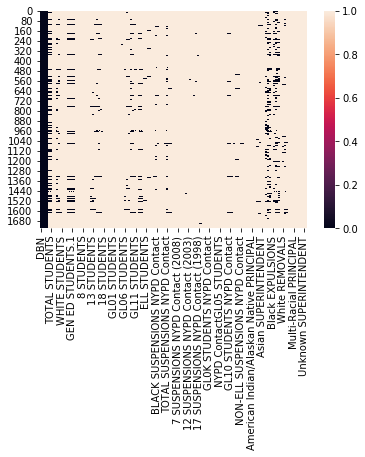

In [67]:
sns.heatmap(suspensionData.isnull())
#visual representation of missing data (of which we have none)

In [75]:
suspensionData["ADMINISTRATIVE DISTRICT"].isnull()
#visual representation of missing data (of which we have none)

#can we map the districts with no suspension data vs districts 
#with suspension data???

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1713    False
1714    False
1715    False
1716    False
1717    False
1718    False
1719    False
1720    False
1721    False
1722    False
1723    False
1724    False
1725    False
1726    False
1727    False
1728    False
1729    False
1730    False
1731    False
1732    False
1733    False
1734    False
1735    False
1736    False
1737    False
1738    False
1739    False
1740    False
1741    False
1742     True
Name: ADMINISTRATIVE DISTRICT, Length: 1743, dtype: bool

In [68]:
#Look at the suspension data grouped by administrative district

TotalSuspensions = suspensionData.groupby("ADMINISTRATIVE DISTRICT").mean()["TOTAL STUDENTS "]
TotalSuspensions

ADMINISTRATIVE DISTRICT
1.0     10.600000
2.0     14.032258
3.0     16.444444
4.0     12.071429
5.0     11.600000
6.0      9.833333
7.0     12.722222
8.0     15.695652
9.0     11.125000
10.0    14.629630
11.0    14.620690
12.0    15.714286
13.0    13.600000
14.0    15.857143
15.0    15.333333
16.0    14.750000
17.0    16.900000
18.0    20.066667
19.0    10.750000
20.0    16.333333
21.0    15.277778
22.0    13.111111
23.0     9.333333
24.0    28.727273
25.0    16.818182
26.0    19.250000
27.0    17.000000
28.0    12.866667
29.0    12.388889
30.0    19.583333
31.0    25.800000
32.0    15.666667
75.0    12.000000
79.0          NaN
97.0          NaN
Name: TOTAL STUDENTS , dtype: float64

In [69]:
blackSuspensions = suspensionData.groupby("ADMINISTRATIVE DISTRICT").mean()["BLACK STUDENTS"]
blackSuspensions

ADMINISTRATIVE DISTRICT
1.0      9.000000
2.0     10.333333
3.0     10.166667
4.0     10.600000
5.0      7.333333
6.0           NaN
7.0      8.800000
8.0     11.571429
9.0      8.750000
10.0    11.666667
11.0    10.937500
12.0    10.857143
13.0    13.333333
14.0    10.250000
15.0     8.800000
16.0    12.500000
17.0    19.000000
18.0    17.100000
19.0    10.000000
20.0    10.000000
21.0    11.500000
22.0    13.727273
23.0     9.750000
24.0     6.000000
25.0    22.500000
26.0    26.666667
27.0    16.090909
28.0     9.833333
29.0    13.000000
30.0    12.000000
31.0    17.000000
32.0    29.000000
75.0    13.000000
79.0          NaN
97.0          NaN
Name: BLACK STUDENTS, dtype: float64

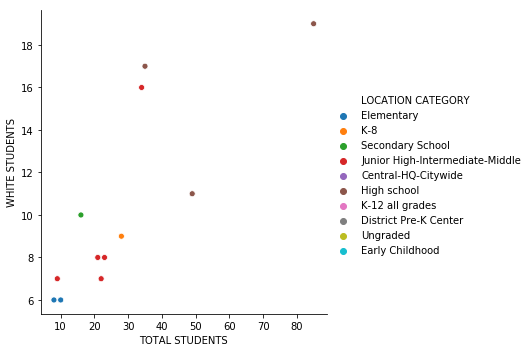

In [70]:
sns.relplot(x = "TOTAL STUDENTS", y = "WHITE STUDENTS", hue = "LOCATION CATEGORY", data = suspensionData )

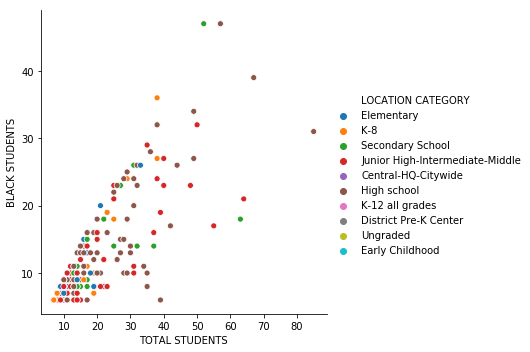

In [71]:
sns.relplot(x = "TOTAL STUDENTS", y = "BLACK STUDENTS", hue = "LOCATION CATEGORY", data = suspensionData )

In [72]:
#  df.plot(x="X", y=["A", "B", "C"], kind="bar")

suspensionData(x = "ADMINISTRATIVE DISTRICT", y = [], kind = "bar")

TypeError: 'DataFrame' object is not callable